In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchgdm as gdm


In [27]:
# - materials
mat_env = gdm.materials.MatConstant(eps=1.0)
mat_struct = gdm.materials.MatDatabase("au")

# - illumination wavelengths
wavelengths = torch.linspace(400.0, 900.0, 51)


/Users/pozzolabadmin/Documents/codebase/envs/activephasemap/lib/python3.11/site-packages/torchgdm/visu/visu2d/_tools.py:54: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


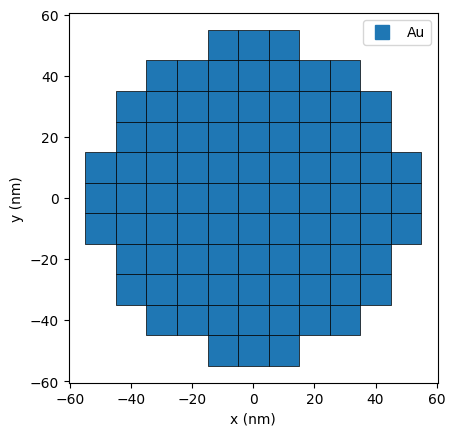

In [32]:
# - environment / illumination
env3d = gdm.env.freespace_3d.EnvHomogeneous3D(env_material=mat_env)
e_inc_3d = gdm.env.freespace_3d.PlaneWave(e0p=1.0, e0s=0.0, inc_angle=180)

# - discretized structure
step3d = 10
d_sphere = 100.0  # nm
sphere = gdm.struct.StructDiscretizedCubic3D(
    gdm.struct.volume.sphere(r=(d_sphere / 2) / step3d),
    step3d,
    mat_struct,
)

# - define simulation
sim3d = gdm.Simulation(
    structures=[sphere],
    illumination_fields=[e_inc_3d],
    environment=env3d,
    wavelengths=wavelengths,
)

# visualize the structure
sim3d.plot_structure()


In [33]:
# perform simulation
sim3d.run()

------------------------------------------------------------
simulation on device 'cpu'...
 - 1 structures
 - 619 positions
 - 619 coupled dipoles
   (of which 619 p, 0 m)
 - 51 wavelengths
 - 1 illumination fields per wavelength

run spectral simulation:


100%|██████████| 51/51 [00:29<00:00,  1.70it/s]

spectrum done in 30.00s
------------------------------------------------------------



In [34]:
cs_sph = gdm.tools.batch.calc_spectrum(sim3d, gdm.postproc.crosssect.total)
cs_geo_sph = gdm.tools.geometry.get_geometric_cross_section(sphere)

spectrum: 100%|██████████| 51/51 [00:00<00:00, 112.07it/s]


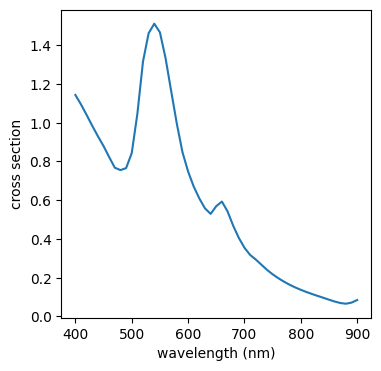

In [35]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(gdm.to_np(wavelengths), gdm.to_np(cs_sph["cs_scat"] / cs_geo_sph))

ax.set_xlabel("wavelength (nm)")
ax.set_ylabel("cross section")

plt.show()